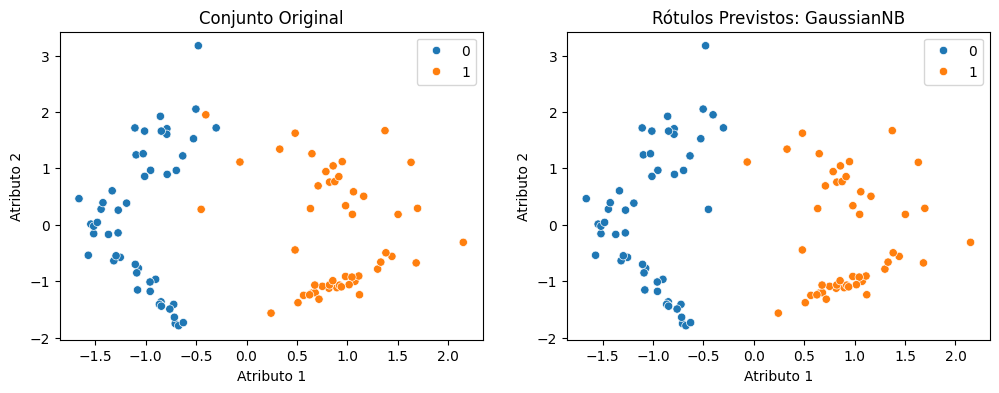

In [1]:
# Exemplo 1 – Treinamento de uma GaussianNB com dados
# aleatórios
# Carrega as bibliotecas utilizadas para criar o conjunto
# de dados, o modelo e os gráficos
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as pyp
import seaborn as sb
# Cria conjunto de dados de 100 instâncias e 2 atributos
# não redundantes
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=1)
# Criando e treinando o modelo
model = GaussianNB()
model.fit(X, y)
# Prevendo os rótulos de cada instância com o modelo
# treinado
y_prevs = model.predict(X)
# Criando gráficos e legendas
fig, axes = pyp.subplots(1, 2, figsize=(12,4))
sb.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=axes[0])
sb.scatterplot(x=X[:,0], y=X[:,1], hue=y_prevs, ax=axes[1])
axes[0].set_title('Conjunto Original')
axes[0].set_xlabel('Atributo 1')
axes[0].set_ylabel('Atributo 2')
axes[1].set_title('Rótulos Previstos: GaussianNB')
axes[1].set_xlabel('Atributo 1')
axes[1].set_ylabel('Atributo 2')

# Show the plots
pyp.show()

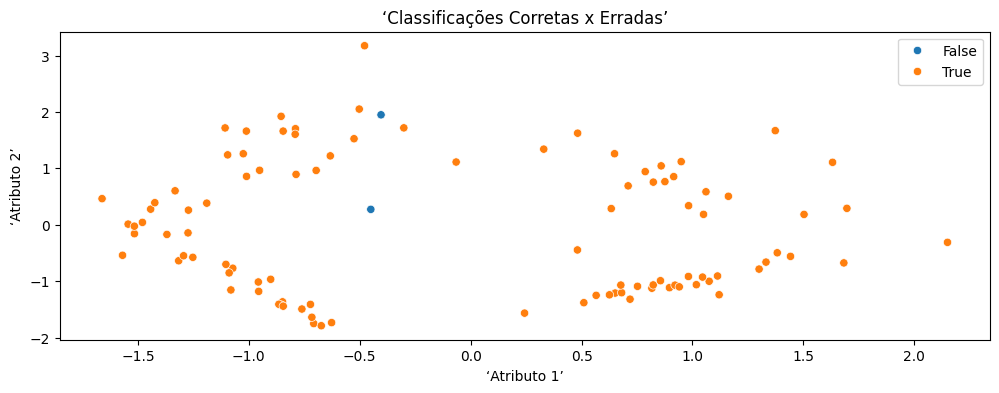

In [2]:
# Exemplo 2 – Destacar as classificações erradas do
# exemplo 1
# Compara a classificação real e prevista de cada instância 
# 
y_erros = [yy == yy_prevs for yy, yy_prevs in zip(y, y_prevs)]
# Criando gráficos e legendas
fig, axes = pyp.subplots(figsize=(12,4))
sb.scatterplot(x=X[:,0], y=X[:,1], hue=y_erros, ax=axes)
axes.set_title('‘Classificações Corretas x Erradas’')
axes.set_xlabel('‘Atributo 1’')
axes.set_ylabel('‘Atributo 2’')

pyp.show()

In [3]:
# Exemplo 3 – Carrega o conjunto Iris e visualiza os itens
# do dicionário
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Exemplo 4 – DataFrame, X e y do conjunto Iris
# Carrega a biblioteca pandas para criar DataFrames
import pandas as pa
from IPython.display import display  # Import the display function
# Separa data em X e target em y
X = iris['data']
y = iris['target']
# Cria um DataFrame utilizando feature _ names como base
# para as colunas
df = pa.DataFrame(data=X, columns=iris['feature_names'])
# Adiciona a coluna de alvo dando nome aos rótulos
# conforme target _ names
df['specie'] = [iris['target_names'][t] for t in y]
# Use the display function to show the DataFrame
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


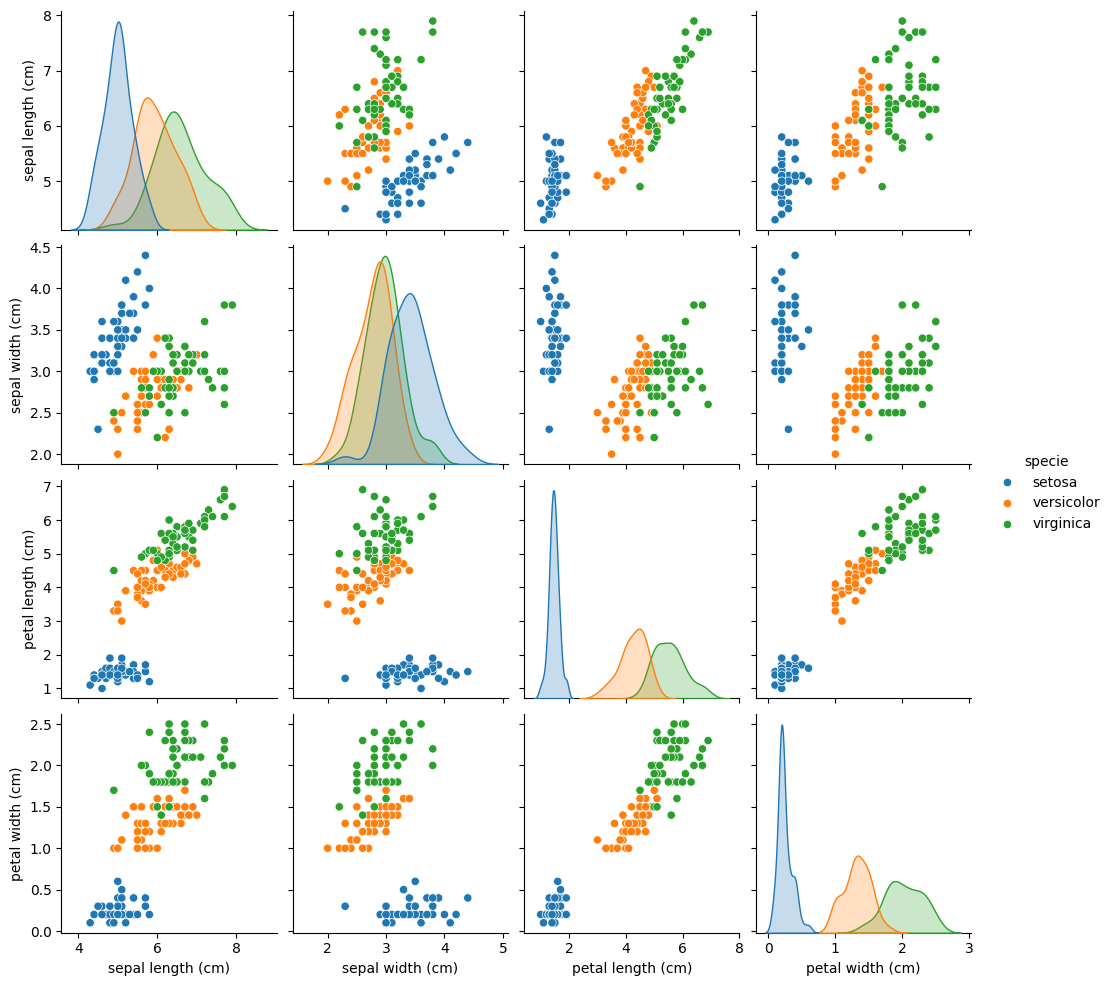

In [5]:
# Exemplo 5 – Gráfico por pares de atributos do conjunto
# Iris
sb.pairplot(df, hue='specie')

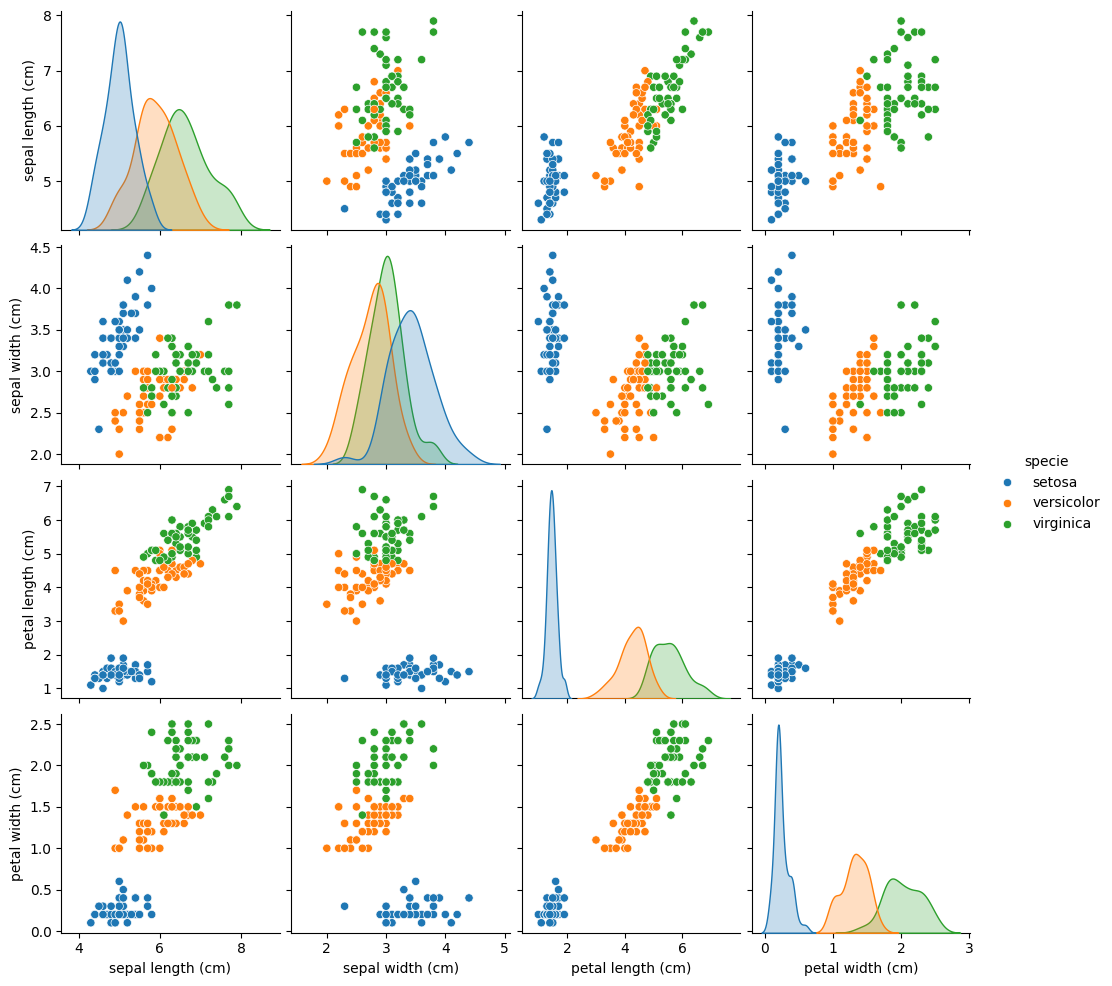

In [6]:
# Exemplo 6 – Gráfico por pares de atributos com os alvos
# previstos
# Criando e treinando um modelo
model = GaussianNB()
model.fit(X, y)
# Prevendo os rótulos de cada instância com o modelo
# treinado
y_prevs = model.predict(X)
# Copiando o quadro original
df_prev = df.copy()
# Substituindo os rótulos originais pelos previstos
df_prev['specie'] = [iris['target_names'][t] for t in y_prevs]
# Exibindo o gráfico por pares dos rótulos previstos
sb.pairplot(df_prev, hue='specie')

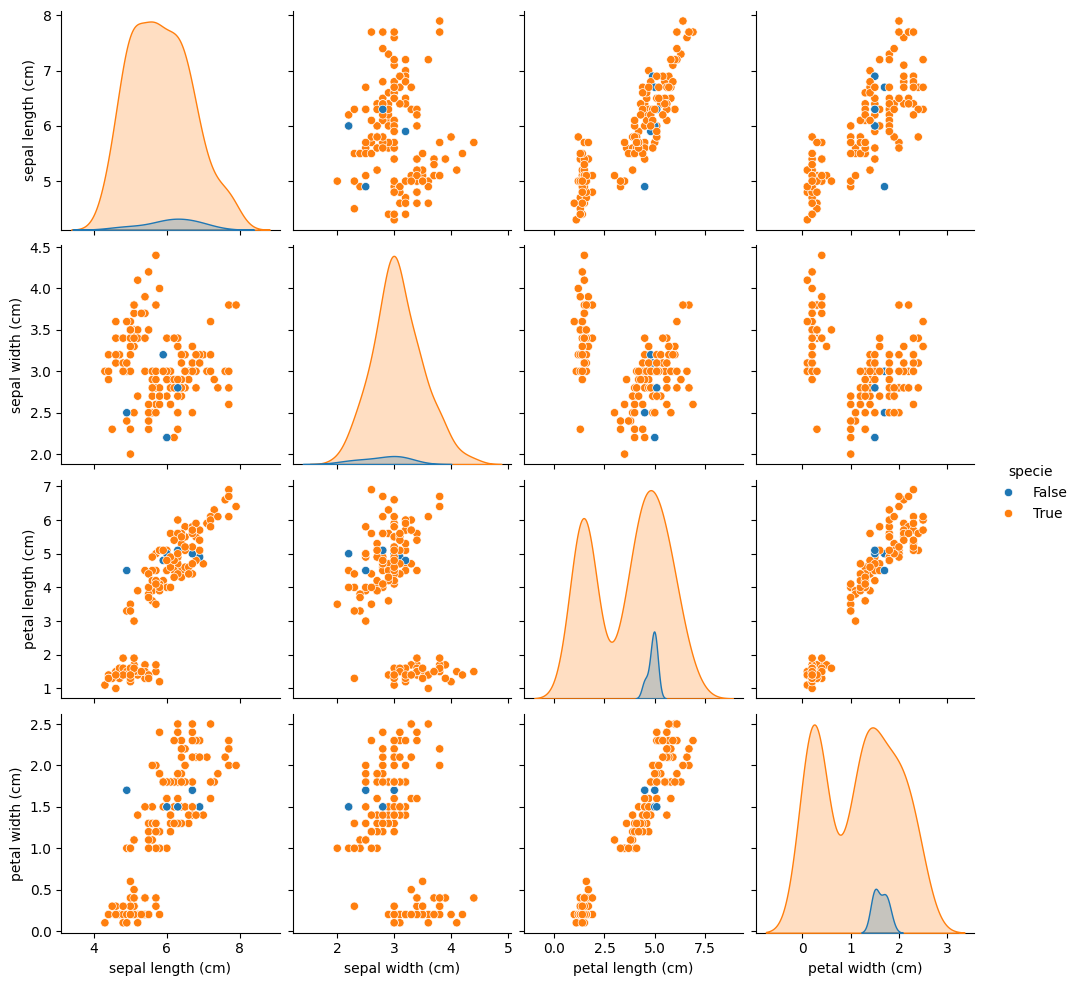

In [7]:
# Exemplo 7 – Gráfico por pares das classificações
# corretas x erradas
# Compara a classificação real e prevista de cada instância
y_erros = [yy == yy_prevs for yy, yy_prevs in zip(y, y_prevs)]
# Copiando o quadro original
df_erros = df.copy()
# Substituindo os rótulos originais pelos acertos/erros
# de previsão
df_erros['specie'] = y_erros
# Exibindo o gráfico por pares dos rótulos certo/errados
sb.pairplot(df_erros, hue='specie')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

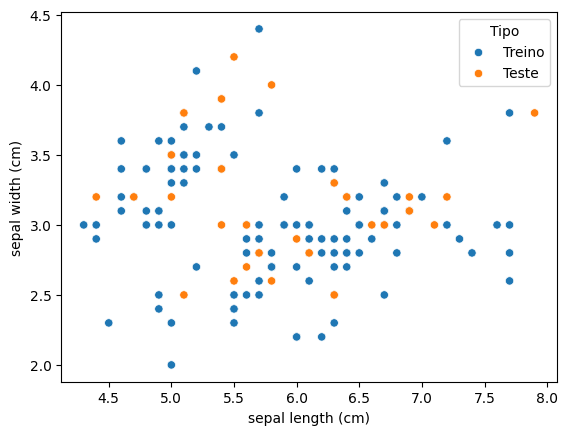

In [8]:
# Exemplo 8 – Conjunto de treinamento e teste
from sklearn.model_selection import train_test_split
import pandas as pa
import seaborn as sb
from sklearn.datasets import load_iris

# Carrega o conjunto de dados Iris
iris = load_iris()
feats = iris['feature_names']
Xdf = pa.DataFrame(iris['data'], columns=feats)
ydf = pa.DataFrame(iris['target'], columns=['specie'])

# Dividindo os dados em conjunto de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(Xdf, ydf, test_size=0.2, random_state=1)

# Criando DataFrames para treino
df_treino = pa.DataFrame(X_treino, columns=feats)
df_treino['Tipo'] = 'Treino'

# Criando DataFrames para teste
df_teste = pa.DataFrame(X_teste, columns=feats)
df_teste['Tipo'] = 'Teste'

# Combinando os conjuntos de treino e teste
df = pa.concat([df_treino, df_teste], ignore_index=True)

# Adicionando a coluna 'specie'
df['specie'] = ydf['specie']

# Plotando o gráfico de dispersão
sb.scatterplot(x=df[feats[0]], y=df[feats[1]], hue=df['Tipo'])


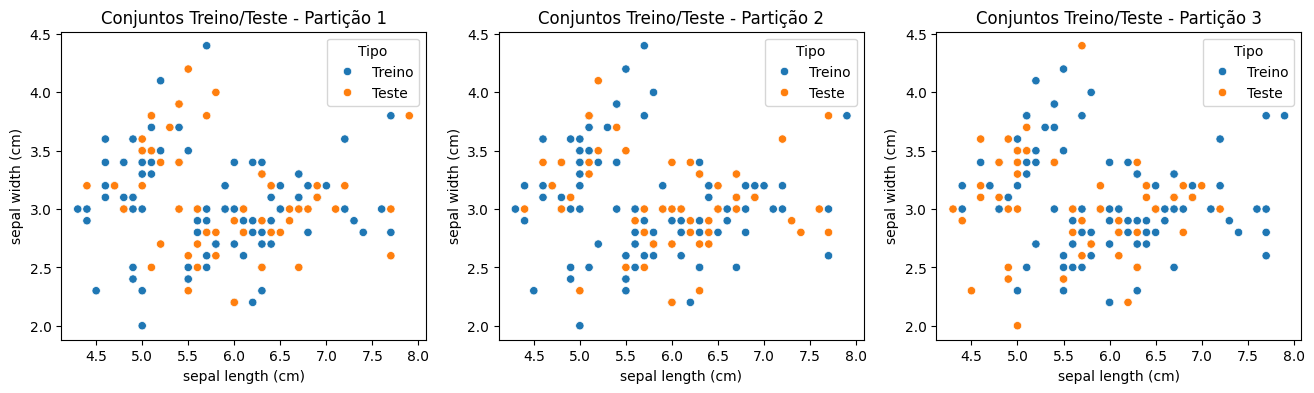

In [9]:
# Exemplo 9 – KFold
from sklearn.model_selection import KFold
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Carrega o conjunto de dados Iris
iris = load_iris()
feats = iris['feature_names']
Xdf = pd.DataFrame(iris['data'], columns=feats)
ydf = pd.DataFrame(iris['target'], columns=['specie'])

# Inicializa o KFold
kfold = KFold(n_splits=3, shuffle=True, random_state=1)

dfs = []

for i_treino, i_teste in kfold.split(Xdf):
    # Criando DataFrame de treino
    df_treino = pd.DataFrame(Xdf.iloc[i_treino], index=i_treino, columns=feats)
    df_treino['Tipo'] = 'Treino'

    # Adicionando DataFrame de teste
    df_teste = pd.DataFrame(Xdf.iloc[i_teste], index=i_teste, columns=feats)
    df_teste['Tipo'] = 'Teste'

    # Combinando conjuntos de treino e teste
    df_combined = pd.concat([df_treino, df_teste], ignore_index=True)
    df_combined['specie'] = ydf['specie']

    dfs.append(df_combined)

# Plotando os conjuntos de treino/teste
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i, df_combined in enumerate(dfs):
    sns.scatterplot(x=df_combined[feats[0]], y=df_combined[feats[1]], hue=df_combined['Tipo'], ax=axes[i])
    axes[i].set_title('Conjuntos Treino/Teste - Partição {0}'.format(i + 1))

# Exibindo os gráficos
plt.show()

In [10]:
# Exemplo 10 – Acurácia
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# Supondo que dfs e df já estejam definidos no código anterior

# Copiando os DataFrames
dfss = dfs.copy()
dfss.append(df)

# Criando chaves para cada DataFrame
chaves = ['KFold 1', 'KFold 2', 'KFold 3', 'Hold-Out']

# Criando um dicionário de DataFrames
dic_df = {ch: df for ch, df in zip(chaves, dfss)}

# Lista para armazenar os resultados de acurácia
accs = []

# Treinando e avaliando o GaussianNB para cada partição
for chave, df in dic_df.items():
    X_treino = df[df['Tipo'] == 'Treino'].drop(labels=['Tipo'], axis=1).values
    X_teste = df[df['Tipo'] == 'Teste'].drop(labels=['Tipo'], axis=1).values
    y_treino = df[df['Tipo'] == 'Treino']['specie'].values
    y_teste = df[df['Tipo'] == 'Teste']['specie'].values
    
    # Criando e treinando o modelo
    modelo = GaussianNB(var_smoothing=1)
    modelo.fit(X_treino, y_treino)
    
    # Calculando a acurácia e armazenando os resultados
    accs.append([chave, accuracy_score(y_teste, modelo.predict(X_teste))])

# Criando um DataFrame com os resultados de acurácia
acc_df = pd.DataFrame(accs, columns=['Partição', 'Acurácia'])
acc_df

,Partição,Acurácia
0,KFold 1,0.0
1,KFold 2,0.0
2,KFold 3,0.0
3,Hold-Out,0.0
